<a href="https://colab.research.google.com/github/Amritasha/ML/blob/main/ml1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [6]:
from fastbook import *
from fastai.vision.widgets import *

In [5]:
key = os.environ.get('AZURE_SEARCH_KEY', '3e9826dc100d4a2f86586ae4929ffe03')

In [6]:
search_images_bing

<function fastbook.search_images_bing>

In [7]:
animal_types = 'dog','cat'
path = Path('animal')

In [8]:
if not path.exists():
    path.mkdir()
    for o in animal_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} animal')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [33]:
fns = get_image_files(path)
fns

(#272) [Path('animal/cat/00000126.jpg'),Path('animal/cat/00000071.jpg'),Path('animal/cat/00000046.jpg'),Path('animal/cat/00000003.jpg'),Path('animal/cat/00000026.jpg'),Path('animal/cat/00000018.jpg'),Path('animal/cat/00000144.jpg'),Path('animal/cat/00000094.jpg'),Path('animal/cat/00000053.jpg'),Path('animal/cat/00000012.jpg')...]

In [34]:
failed = verify_images(fns)
failed

(#0) []

In [11]:
failed.map(Path.unlink);

In [26]:
animal = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [27]:
dls = animal.dataloaders(path)

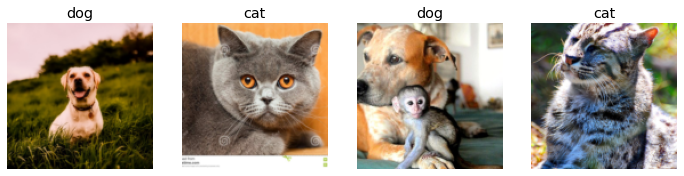

In [28]:
dls.valid.show_batch(max_n=4, nrows=1)

In [29]:
animal = animal.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = animal.dataloaders(path)

In [30]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.100440,1.546255,0.407407,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.430734,0.479144,0.166667,00:14
1,0.387344,0.420710,0.129630,00:14
2,0.324148,0.371406,0.111111,00:14
3,0.271642,0.319521,0.092593,00:14


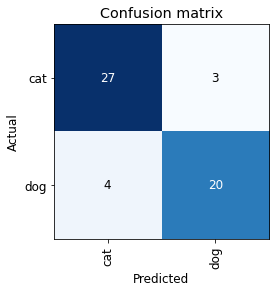

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

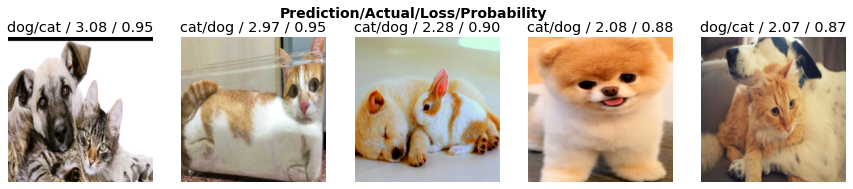

In [19]:
interp.plot_top_losses(5, nrows=1)

In [20]:
learn34 = cnn_learner(dls, resnet34, metrics=error_rate)
learn34.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.641249,0.779822,0.277778,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.356969,0.338723,0.148148,00:16
1,0.286970,0.286457,0.074074,00:16
2,0.250427,0.362983,0.074074,00:16
3,0.218602,0.384157,0.092593,00:15


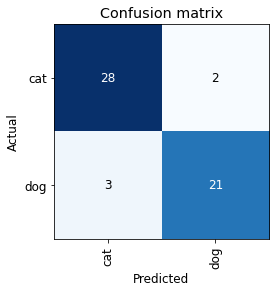

In [21]:
interp34 = ClassificationInterpretation.from_learner(learn34)
interp34.plot_confusion_matrix()

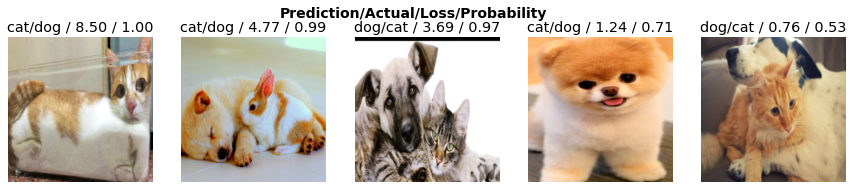

In [22]:
interp34.plot_top_losses(5, nrows=1)

In [3]:
import cv2

import os,glob

from os import listdir,makedirs

from os.path import isfile,join
path = 'animal/cat' # Source Folder
dstpath = 'animal2/cat' # Destination Folder
try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in same folder")
# Folder won't used
files = list(filter(lambda f: isfile(join(path,f)), listdir(path)))
for image in files:
    try:
        img = cv2.imread(os.path.join(path,image))
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        dstPath = join(dstpath,image)
        cv2.imwrite(dstPath,gray)
    except:
        print ("{} is not converted".format(image))
for fil in glob.glob("*.jpg"):
    try:
        image = cv2.imread(fil) 
        gray_image = cv2.cvtColor(os.path.join(path,image), cv2.COLOR_BGR2GRAY) # convert to greyscale
        cv2.imwrite(os.path.join(dstpath,fil),gray_image)
    except:
        print('{} is not converted')

00000064.0&q=45&auto=format&w=926&fit=clip is not converted


In [4]:
import cv2

import os,glob

from os import listdir,makedirs

from os.path import isfile,join
path = 'animal/dog' # Source Folder
dstpath = 'animal2/dog' # Destination Folder
try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in same folder")
# Folder won't used
files = list(filter(lambda f: isfile(join(path,f)), listdir(path)))
for image in files:
    try:
        img = cv2.imread(os.path.join(path,image))
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        dstPath = join(dstpath,image)
        cv2.imwrite(dstPath,gray)
    except:
        print ("{} is not converted".format(image))
for fil in glob.glob("*.jpg"):
    try:
        image = cv2.imread(fil) 
        gray_image = cv2.cvtColor(os.path.join(path,image), cv2.COLOR_BGR2GRAY) # convert to greyscale
        cv2.imwrite(os.path.join(dstpath,fil),gray_image)
    except:
        print('{} is not converted')

00000036.jpg?w=450 is not converted
00000117.3157894736842&height=1200&w=1080&width=1600 is not converted


In [12]:
fns2 = get_image_files(path2)
fns2

(#272) [Path('animal2/cat/00000126.jpg'),Path('animal2/cat/00000071.jpg'),Path('animal2/cat/00000046.jpg'),Path('animal2/cat/00000003.jpg'),Path('animal2/cat/00000026.jpg'),Path('animal2/cat/00000018.jpg'),Path('animal2/cat/00000144.jpg'),Path('animal2/cat/00000094.jpg'),Path('animal2/cat/00000053.jpg'),Path('animal2/cat/00000012.jpg')...]

In [8]:
failed = verify_images(fns2)
failed

(#0) []

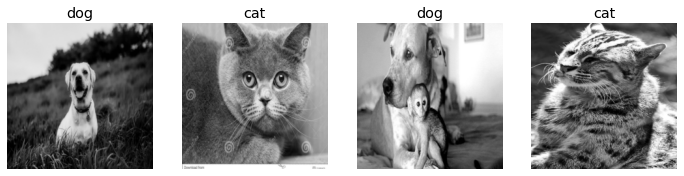

In [13]:
path2 = Path('animal2')
animal2 = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))
animal2 = animal2.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = animal2.dataloaders(path2)
dls.valid.show_batch(max_n=4, nrows=1)

In [14]:
learn2 = cnn_learner(dls, resnet18, metrics=error_rate)
learn2.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.178371,0.444022,0.166667,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.484146,0.535706,0.203704,00:09
1,0.431571,0.512744,0.148148,00:09
2,0.337710,0.603274,0.129630,00:09
3,0.292249,0.622066,0.148148,00:09


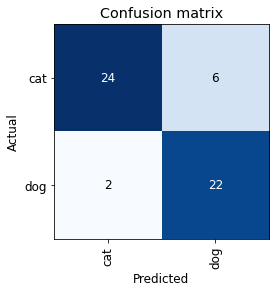

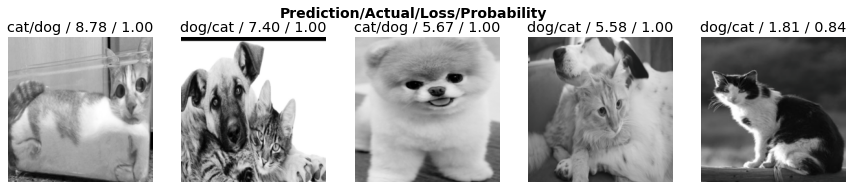

In [16]:
interp = ClassificationInterpretation.from_learner(learn2)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=1)

In [17]:
learn234 = cnn_learner(dls, resnet34, metrics=error_rate)
learn234.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.109920,0.219586,0.111111,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.587224,0.202593,0.129630,00:10
1,0.478703,0.246351,0.148148,00:10
2,0.379732,0.387299,0.185185,00:10
3,0.320912,0.430022,0.185185,00:10


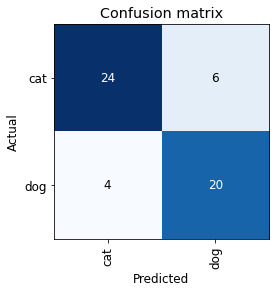

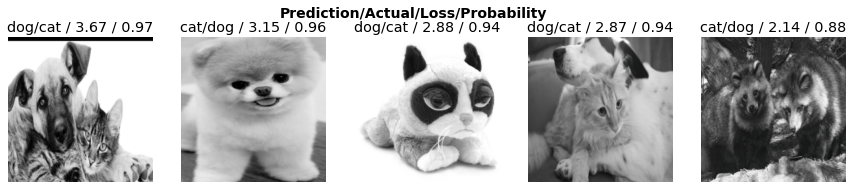

In [18]:
interp = ClassificationInterpretation.from_learner(learn234)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=1)